# Read input image file.

In [47]:
dir_path = "/content/drive/MyDrive/Work/Three boybrand/Image/Gitcode/Images/"
file_name ="FSW000-1000-15-03_92.jpg"
file_path = dir_path + file_name

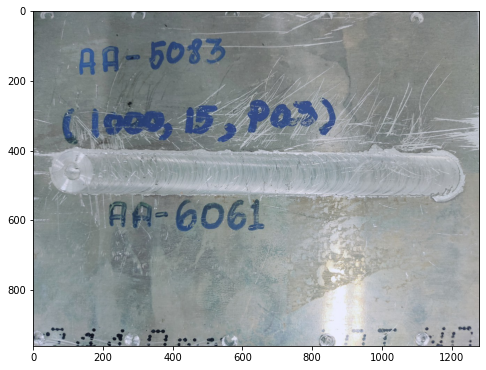

In [43]:
import skimage
from skimage import filters, transform, io
import matplotlib.pyplot as plt
import numpy as np

img = io.imread(file_path)
plt.figure(figsize=(8,8))
plt.imshow(img, cmap="gray")
plt.show()

# Basic function threshold and crop image

In [44]:
def create_binary_mask(img, threshold=0.5):
    gray_image = skimage.color.rgb2gray(img)
    blurred_image = filters.gaussian(gray_image, sigma=10)
    binary_mask = (blurred_image > threshold) 
    return binary_mask

def segment(img, border=0.1, threshold=0.5):
    binary = create_binary_mask(img, threshold)
    y = np.sum(binary, axis=1)
    yn = y/np.max(y)
    indexs = np.where(yn > 0.75)[0]
    vmin = np.min(indexs) -  int(img.shape[1]*border)
    vmax = np.max(indexs) +  int(img.shape[1]*border)
    vrange = vmax-vmin
    vmin = max(0, int(vmin-vrange*border))
    vmax = min(yn.shape[0]-1, int(vmax+vrange*border))

    crop_image = img[vmin:vmax, :, :]
    return crop_image



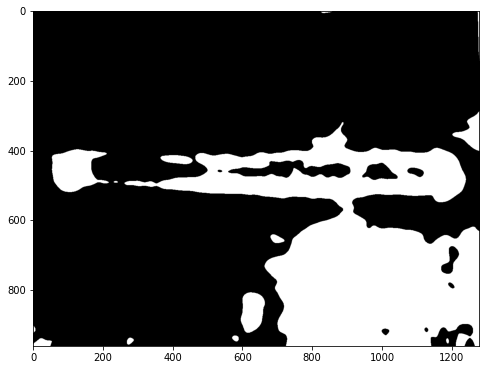

In [45]:
binary = create_binary_mask(img, 0.65)
plt.figure(figsize=(8,8))
plt.imshow(binary, cmap="gray")

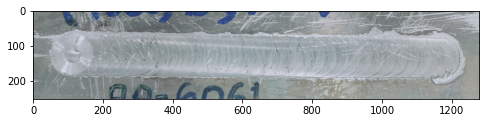

In [46]:

crop_image = segment(img, border=0.05, threshold=0.65)
plt.figure(figsize=(8,8))
plt.imshow(crop_image)

In [54]:
io.imsave(dir_path + "Crop_"+file_name, crop_image )

In [50]:
np.max(crop_image)

255

In [51]:
dir_path + "Crop_"+file_name 

'/content/drive/MyDrive/Work/Three boybrand/Image/Gitcode/Images/Crop_FSW000-1000-15-03_92.jpg'

In [52]:
crop_image.dtype

dtype('uint8')